In [1]:
import pandas as pd

In [2]:
sample_1=pd.read_excel('C:/files/sample_1.xlsx',
                      header=1,
                      skipfooter=2,
                      usecols='A:C')
sample_1.head(3)

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319


In [3]:
sample_1.tail(3)

,국적코드,성별,입국객수
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [4]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [5]:
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [6]:
sample_1['입국객수']

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [7]:
sample_1[['국적코드','입국객수']]

,국적코드,입국객수
0,A01,106320
1,A01,191436
2,A31,319
3,A31,42
4,A18,158912
5,A18,232943


In [8]:
sample_1['기준년월']='2019-11'
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [9]:
condition=(sample_1['성별']=='남성')
condition

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool

In [10]:
sample_1[condition]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [11]:
condition=(sample_1['입국객수']>=150000)
sample_1[condition]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [12]:
conditions=(sample_1['성별']=='남성')&(sample_1['입국객수']>=150000)
conditions

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [13]:
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
4,A18,남성,158912,2019-11


In [15]:
conditions=(sample_1['국적코드']=='A01')\
|(sample_1['국적코드']=='A18')
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [16]:
conditions=(sample_1['국적코드'].isin(['A01','A18']))
conditions

0     True
1     True
2    False
3    False
4     True
5     True
Name: 국적코드, dtype: bool

In [17]:
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [18]:
conditions=(sample_1['국적코드'].isin(['A01','A18']))
sample_1[conditions==False]

,국적코드,성별,입국객수,기준년월
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


In [19]:
code_master=pd.read_excel('C:/files/sample_codemaster.xlsx')
code_master.head(3)

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩


In [20]:
sample_1_code=pd.merge(left=sample_1,
                      right=code_master,
                      how='left',
                      left_on='국적코드',
                      right_on='국적코드')
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [21]:
sample_1_code_inner=pd.merge(left=sample_1,
                            right=code_master,
                            how='inner',
                            left_on='국적코드',
                            right_on='국적코드')
sample_1_code_inner

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A18,남성,158912,2019-11,중국
3,A18,여성,232943,2019-11,중국


In [22]:
sample_2=pd.read_excel('C:/files/sample_2.xlsx',
                      header=1,
                      skipfooter=2,
                      usecols='A:C')
sample_2['기준년월']='2019-12'
sample_2_code=pd.merge(left=sample_2,
                      right=code_master,
                      how='left',
                      left_on='국적코드',
                      right_on='국적코드')
sample_2_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [23]:
sample=sample_1_code.append(sample_2_code, ignore_index=True)
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [24]:
sample.to_excel('C:/files/sample.xlsx')

In [25]:
sample.to_excel('C:/files/sample_index_false.xlsx',index=False)

In [26]:
sample_pivot=sample.pivot_table(values='입국객수',
                               index='국적명',
                               columns='기준년월',
                               aggfunc='mean')
sample_pivot

기준년월,2019-11,2019-12
국적명,,
일본,148878.0,128146.5
중국,195927.5,202281.5


In [27]:
sample_pivot_2=sample.pivot_table(values='입국객수',
                                 index='국적명',
                                 aggfunc='max')
sample_pivot_2

,입국객수
국적명,
일본,191436
중국,249023


In [29]:
! pip install selenium

In [83]:
from selenium import webdriver

In [84]:
driver=webdriver.Chrome('c:/playwithdata/chromedriver.exe')

In [85]:
url='http:/www.melon.com/chart/index.htm'
driver.get(url)

In [86]:
from bs4 import BeautifulSoup
html=driver.page_source
soup=BeautifulSoup(html, 'html.parser')

In [87]:
songs=soup.select('table>tbody>tr')
print(len(songs))

100


In [88]:
print(songs[0])

<tr data-song-no="33372781">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="라일락 곡 선택" type="checkbox" value="33372781"/></div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10554246');" title="IU 5th Album 'LILAC'">
<img alt="IU 5th Album 'LILAC' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/105/54/246/10554246_20210325161233_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('33372781');" title="라일락 곡정보"><span class="none">곡정보</span></a>
</div></td>
<td><div class="wrap">
<div class="wrap_song_info">
<div class="ellipsis rank01"><span>
<a href="javascript:melon.play.playSong('19030101',33372781);" title="라일락 재생">라일락</a>
</span></div>
<br/>
<div class="ellipsis rank0

In [89]:
song=songs[0]

In [90]:
title=song.select('a')
len(title)

6

In [91]:
title=song.select('span>a')
len(title)

2

In [92]:
title=song.select('div.ellipsis.rank01>span>a')
len(title)

1

In [93]:
title=song.select('div.ellipsis.rank01>span>a')[0].text
title

'라일락'

In [94]:
singer=song.select('div.ellipsis.rank02>a')[0].text
singer

'아이유'

In [95]:
for song in songs:
    title=song.select('div.ellipsis.rank01>span>a')[0].text
    singer=song.select('div.ellipsis.rank02>a')[0].text
    print(title,singer,sep='|')

라일락|아이유
롤린 (Rollin')|브레이브걸스
Celebrity|아이유
Coin|아이유
On The Ground|로제 (ROSÉ)
Flu|아이유
봄 안녕 봄|아이유
LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)|양요섭
Dynamite|방탄소년단
돌림노래 (Feat. DEAN)|아이유
아이와 나의 바다|아이유
밤하늘의 별을(2020)|경서
밝게 빛나는 별이 되어 비춰줄게|송이한
어푸 (Ah puh)|아이유
빈 컵 (Empty Cup)|아이유
내 손을 잡아|아이유
잠이 오질 않네요|장범준
에필로그|아이유
VVS (Feat. JUSTHIS) (Prod. GroovyRoom)|미란이 (Mirani)
취기를 빌려 (취향저격 그녀 X 산들)|산들
Lovesick Girls|BLACKPINK
나랑 같이 걸을래 (바른연애 길잡이 X 적재)|적재
Gone|로제 (ROSÉ)
이 밤을 빌려 말해요 (바른연애 길잡이 X 10CM)|10CM
흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야|장범준
Blueming|아이유
에잇(Prod.&Feat. SUGA of BTS)|아이유
그날에 나는 맘이 편했을까|이예준
오래된 노래|스탠딩 에그
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지|AKMU (악동뮤지션)
힘든 건 사랑이 아니다|임창정
Life Goes On|방탄소년단
사실 나는 (Feat.전건호)|경서예지
Savage Love (Laxed - Siren Beat) (BTS Remix)|Jawsh 685
고백 (바른연애 길잡이 X 허각)|허각
METEOR|창모 (CHANGMO)
봄날|방탄소년단
모든 날, 모든 순간 (Every day, Every Moment)|폴킴
운전만해 (We Ride)|브레이브걸스
Dolphin|오마이걸 (OH MY GIRL)
어떻게 지내 (Prod. By VAN.C)|오반 (OVAN)
2002|Anne-Marie
추억은 만남보다 이별에 남아|정동하
내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)|규현 (KYUHYUN)
함께 했는데 이별은 

In [96]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver=webdriver.Chrome('c:/playwithdata/chromedriver.exe')
url='http:www.melon.com/chart/index.htm'
driver.get(url)

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [97]:
song_data=[]
rank=1
songs=soup.select('table>tbody>tr')
for song in songs:
    title=song.select('div.rank01>span>a')[0].text
    singer=song.select('div.rank02>a')[0].text
    song_data.append(['Melon',rank,title,singer])
    rank=rank+1

In [98]:
import pandas as pd
columns=['서비스','순위','타이틀','가수']
pd_data=pd.DataFrame(song_data,columns=columns)
pd_data.head()

,서비스,순위,타이틀,가수
0,Melon,1,라일락,아이유
1,Melon,2,롤린 (Rollin'),브레이브걸스
2,Melon,3,Celebrity,아이유
3,Melon,4,Coin,아이유
4,Melon,5,On The Ground,로제 (ROSÉ)


In [99]:
pd_data.to_excel('c:/files/melon.xlsx',index=False)

In [100]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver=webdriver.Chrome('C:\playwithdata/chromedriver.exe')
url='https://music.bugs.co.kr/chart'
driver.get(url)

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [101]:
songs=soup.select('table.byChart>tbody>tr')
print(len(songs))

100


In [102]:
print(songs[0])

<tr albumid="4027185" artistid="80049126" multiartist="N" mvid="590678" rowtype="track" trackid="6097466">
<input name="_isStream" type="hidden" value="6097466"/>
<input name="_isDown" type="hidden" value="6097466"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="라일락" type="checkbox" value="6097466"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change none"><em>0</em><span>변동없음</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/4027185?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="IU 5th Album 'LILAC' 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/40271/4027185.jpg?version=20210327211514.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/6097466?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick=

In [103]:
song=songs[0]

In [104]:
title=song.select('a')
len(title)

11

In [105]:
title=song.select('p.title>a')[0].text
title

'라일락'

In [106]:
songs=soup.select('table.byChart>tbody>tr')
for song in songs:
    title=song.select('p.title>a')[0].text
    singer=song.select('p.artist>a')[0].text
    print(title,singer,sep='|')

라일락|아이유(IU)
Coin|아이유(IU)
롤린 (Rollin')|브레이브걸스(Brave Girls)
Flu|아이유(IU)
Peaches (feat. Daniel Caesar, Giveon)|Justin Bieber(저스틴 비버)
돌림노래 (Feat. DEAN)|아이유(IU)
어푸 (Ah puh)|아이유(IU)
아이와 나의 바다|아이유(IU)
Celebrity|아이유(IU)
봄 안녕 봄|아이유(IU)
On The Ground|로제(ROSÉ)
에필로그|아이유(IU)
빈 컵 (Empty Cup)|아이유(IU)
운전만해 (We Ride)|브레이브걸스(Brave Girls)
LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)|양요섭
Gone|로제(ROSÉ)
Leave The Door Open|Bruno Mars(브루노 마스)
어떤X (What Type of X)|제시(Jessi)
Like 1999|Valley
Dynamite|방탄소년단
내 손을 잡아|아이유(IU)
At My Worst|Pink Sweat$
Don't Call Me|SHINee (샤이니)
너의 흔적|엠씨더맥스 (M.C the MAX)
꼬리 (TAIL)|선미
이렇게 좋아해 본 적이 없어요|CHEEZE(치즈)
소란한 밤을 지나|잔나비
사랑하는 당신께|폴킴(Paul Kim)
밤하늘의 별을(2020)|경서
되풀이|임창정
멜로디|ASH ISLAND
parachute|John K
이 밤을 빌려 말해요 (바른연애 길잡이 X 10CM)|10CM
그 한마디 (바른연애 길잡이 X 이하이)|이하이
Lovesick Girls|BLACKPINK
BACKPACK (Feat. CHANGMO)|강서빈 (YUNG CHENS)
잠이 오질 않네요|장범준
취기를 빌려 (취향저격 그녀 X 산들)|산들
나랑 같이 걸을래 (바른연애 길잡이 X 적재)|적재
별빛 같은 나의 사랑아|임영웅
함께 했는데 이별은 나 혼자인 거야|소정(레이디스 코드)
Blueming|아이유(IU)
에잇(Prod.&Feat. SUGA of BTS)|아이

In [107]:
song_data=[]
rank=1
songs=soup.select('table.byChart>tbody>tr')
for song in songs:
    title=song.select('p.title>a')[0].text
    singer=song.select('p.artist>a')[0].text
    song_data.append(['Bugs',rank,title,singer])
    rank=rank+1

In [108]:
import pandas as pd
columns=['서비스','순위','타이틀','가수']
pd_data=pd.DataFrame(song_data,columns=columns)
pd_data.head(5)

,서비스,순위,타이틀,가수
0,Bugs,1,라일락,아이유(IU)
1,Bugs,2,Coin,아이유(IU)
2,Bugs,3,롤린 (Rollin'),브레이브걸스(Brave Girls)
3,Bugs,4,Flu,아이유(IU)
4,Bugs,5,"Peaches (feat. Daniel Caesar, Giveon)",Justin Bieber(저스틴 비버)


In [109]:
pd_data.to_excel('c:/files/bugs.xlsx',index=False)

In [110]:
driver=webdriver.Chrome('c:/playwithdata/chromedriver.exe')
url='https://www.genie.co.kr/chart/top200'
driver.get(url)
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [111]:


song_data=[]
rank=1
songs=soup.select('tbody>tr')
for song in songs:
    title=song.select('a.title')[0].text.strip()
    singer=song.select('a.artist')[0].text
    song_data.append(['Genie',rank,title,singer])
    rank=rank+1
    
columns=['서비스','순위','타이틀','가수']
pd_data=pd.DataFrame(song_data,columns=columns)
pd_data.to_excel('c:/files/genie.xlsx',index=False)

In [112]:
import pandas as pd
excel_names=['c:/files/melon.xlsx','c:/files/bugs.xlsx','c:/files/genie.xlsx']
append_data=pd.DataFrame()
for name in excel_names:
    pd_data=pd.read_excel(name)
    append_data=append_data.append(pd_data)

In [113]:
append_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    int64 
 2   타이틀     250 non-null    object
 3   가수      250 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [115]:
append_data.to_excel('c:/files/total.xlsx',index=False)

In [116]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [137]:
browser=webdriver.Chrome('c://playwithdata/chromedriver.exe')
url="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

In [118]:
html=browser.page_source
soup=BeautifulSoup(html,'html.parser')

In [119]:
channel_list=soup.select('tr')
print(len(channel_list),'\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [120]:
channel_list=soup.select('form>table>tbody>tr')
print(len(channel_list))

100


In [121]:
channel=channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AAUvwnheBe2kEkBDitMl_iIGaTiiP4PeG6pO562vu9ch7g=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AAUvwnheBe2kEkBDitMl_iIGaTiiP4PeG6pO562vu9ch7g=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [122]:
category=channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [123]:
title=channel.select('h1>a')[0].text.strip()
print(title)

BLACKPINK


In [124]:
subscriber=channel.select('.subscriber_cnt')[0].text
view=channel.select('.view_cnt')[0].text
video=channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

5930만
167억0034만
350개


In [131]:
channel_list=soup.select('form>table>tbody>tr')
for channel in channel_list:
    title=channel.select('h1>a')[0].text.strip()
    category=channel.select('p.category')[0].text.strip()
    subscriber=channel.select('.subscriber_cnt')[0].text
    view=channel.select('.view_cnt')[0].text
    video=channel.select('.video_cnt')[0].text
    print(title,category,subscriber,view,video)

햄튜브 [미분류] 52만 2억6620만 1,048개
근황올림픽 [미분류] 52만 2억2039만 198개
Dragon Stone [음악/댄스/가수] 52만 3129만 143개
AB6IX [미분류] 51만 2617만 199개
느낌적인느낌 [BJ/인물/연예인] 51만 4968만 109개
코믹마트 [미분류] 51만 1억4383만 163개
과학드림 [Science Dream] [미분류] 51만 7181만 87개
Mina's TV 미나네TV [음악/댄스/가수] 51만 1914만 125개
아리둥절 Ari the Corgi [애완/반려동물] 51만 1억3554만 208개
빅헤드 [게임] 51만 2억7027만 3,377개
에버랜드 - EVERLAND [미분류] 51만 1억5123만 1,883개
서울의소리 Voice of Seoul [뉴스/정치/사회] 51만 2억2106만 6,615개
유이뿅YUIPYON [미분류] 51만 1억1634만 279개
자몽티비 [게임] 51만 4억5032만 1,917개
최케빈 [게임] 51만 6억0231만 3,181개
드립팩토리 [Dlib Factory] [미분류] 51만 1억5076만 130개
joanday [TV/방송] 51만 6531만 617개
Muggo [음식/요리/레시피] 51만 1억7167만 1,254개
비누TV [게임] 51만 3억9597만 1,614개
풍자테레비 [BJ/인물/연예인] 50만 1억9548만 1,402개
Flow Music [음악/댄스/가수] 50만 1억0135만 570개
KBS Entertain: 깔깔티비 [TV/방송] 50만 6억5179만 4,180개
한국경제TV [뉴스/정치/사회] 50만 1억6459만 48,058개
레이디액션 [TV/방송] 50만 2억0267만 311개
두치와뿌꾸 [게임] 50만 6억8793만 9,239개
상현아웃겨줘parksanghyun [TV/방송] 50만 1억5844만 356개
와빌 [영화/만화/애니] 50만 8130만 193개
스타일가이드 최겨울 [패션/미용] 50만 8604만 739개
국방TV

In [142]:
results=[]
for page in range(1,11):
    url=f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
    browser.get(url)
    time.sleep(2)
    html=browser.page_source
    soup=BeautifulSoup(html,'html.parser')
    channel_list=soup.select('form>table>tbody>tr')
    for channel in channel_list:
        title=channel.select('h1>a')[0].text.strip()
        category=channel.select('p.category')[0].text.strip()
        subscriber=channel.select('.subscriber_cnt')[0].text
        view=channel.select('.view_cnt')[0].text
        video=channel.select('.video_cnt')[0].text
        data=[title,category,subscriber,view,video]
        results.append(data)

In [143]:
df=pd.DataFrame(results)
df.columns=['title','category','subscriber','view','video']
df.to_excel('c:/files/youtube_rank.xlsx',index=False)

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
from matplotlib import font_manager, rc
import platform
if platform.system()=='Windows':
    path='c:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system()=='Darwin':
    rc('font',family='AppleGothic')
else:
    print('Check your OS system')

In [148]:
df=pd.read_excel('c:/files/youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],5930만,167억0034만,350개
1,Big Hit Labels,[음악/댄스/가수],5250만,152억2794만,541개
2,BANGTANTV,[음악/댄스/가수],4670만,92억0204만,"1,458개"
3,SMTOWN,[음악/댄스/가수],2670만,201억4620만,"3,668개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [149]:
df.tail()

,title,category,subscriber,view,video
995,채채ChaeChae,[BJ/인물/연예인],46만,1억2480만,339개
996,[에일리 OFFICIAL] aileemusic,[미분류],46만,6003만,96개
997,키다리형,[스포츠/운동],46만,8808만,"1,076개"
998,3D운전교실,[TV/방송],46만,1억2584만,"1,234개"
999,창배먹방 chang_bae,[음식/요리/레시피],46만,2억2139만,"1,181개"


In [150]:
df['subscriber'][0:10]

0    5930만
1    5250만
2    4670만
3    2670만
4    2650만
5    2360만
6    2230만
7    2010만
8    1740만
9    1730만
Name: subscriber, dtype: object

In [151]:
df['subscriber'].str.replace('만','0000')[0:10]

0    59300000
1    52500000
2    46700000
3    26700000
4    26500000
5    23600000
6    22300000
7    20100000
8    17400000
9    17300000
Name: subscriber, dtype: object

In [152]:
df['replaced_subscriber']=df['subscriber'].str.replace('만','0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],5930만,167억0034만,350개,59300000
1,Big Hit Labels,[음악/댄스/가수],5250만,152억2794만,541개,52500000
2,BANGTANTV,[음악/댄스/가수],4670만,92억0204만,"1,458개",46700000
3,SMTOWN,[음악/댄스/가수],2670만,201억4620만,"3,668개",26700000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [154]:
df['replaced_subscriber']=df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [155]:
pivot_df=df.pivot_table(index='category',values='replaced_subscriber',aggfunc=['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],94170000,71
[IT/기술/컴퓨터],7390000,8
[TV/방송],216670000,149
[게임],71370000,86
[교육/강의],21260000,21


In [157]:
pivot_df.columns=['subscriber_sum','category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],94170000,71
[IT/기술/컴퓨터],7390000,8
[TV/방송],216670000,149
[게임],71370000,86
[교육/강의],21260000,21


In [159]:
pivot_df=pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],94170000,71
1,[IT/기술/컴퓨터],7390000,8
2,[TV/방송],216670000,149
3,[게임],71370000,86
4,[교육/강의],21260000,21


In [160]:
pivot_df=pivot_df.sort_values(by='subscriber_sum',ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],607690000,167
17,[키즈/어린이],249640000,90
2,[TV/방송],216670000,149
11,[음식/요리/레시피],160450000,82
7,[미분류],100700000,98


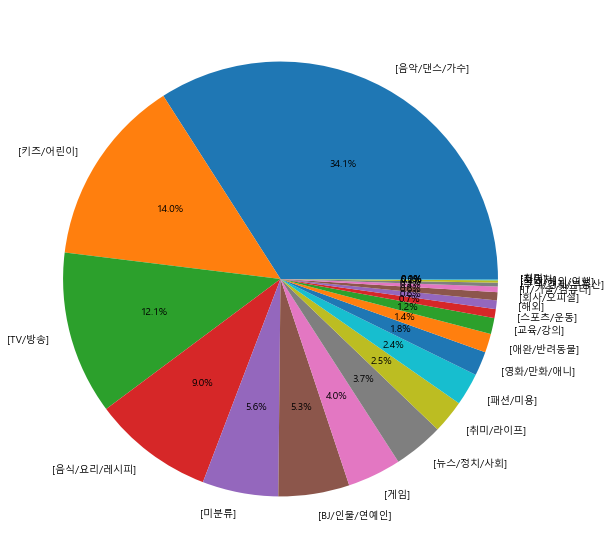

In [161]:
plt.figure(figsize=(30,10))
plt.pie(pivot_df['subscriber_sum'],labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()

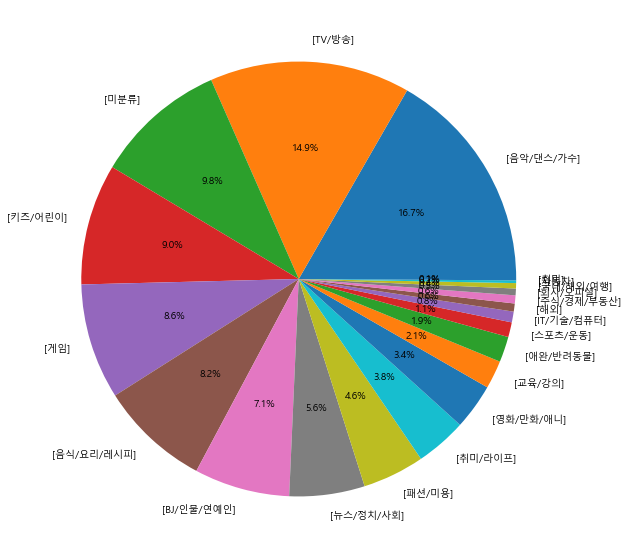

In [162]:
pivot_df=pivot_df.sort_values(by='category_count',ascending=False)
pivot_df.head()
plt.figure(figsize=(30,10))
plt.pie(pivot_df['category_count'],labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()